In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

## Copy the loss prints from an executed notebook to the variable below:

In [2]:
loss_text = """ 
Epoch 1/100
600/600 [==============================] - 181s 126ms/step - monet_gen_loss: 4.4465 - photo_gen_loss: 4.5925 - monet_disc_loss: 0.6456 - photo_disc_loss: 0.6094
Epoch 2/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 3.5567 - photo_gen_loss: 3.7502 - monet_disc_loss: 0.6551 - photo_disc_loss: 0.6013
Epoch 3/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 3.2553 - photo_gen_loss: 3.4227 - monet_disc_loss: 0.6404 - photo_disc_loss: 0.6117
Epoch 4/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 3.1788 - photo_gen_loss: 3.3007 - monet_disc_loss: 0.6250 - photo_disc_loss: 0.6082
Epoch 5/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 3.1195 - photo_gen_loss: 3.1674 - monet_disc_loss: 0.6196 - photo_disc_loss: 0.6193
Epoch 6/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 3.0219 - photo_gen_loss: 3.0566 - monet_disc_loss: 0.6201 - photo_disc_loss: 0.6194
Epoch 7/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.9444 - photo_gen_loss: 2.9706 - monet_disc_loss: 0.6150 - photo_disc_loss: 0.6170
Epoch 8/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.8714 - photo_gen_loss: 2.9010 - monet_disc_loss: 0.6137 - photo_disc_loss: 0.6154
Epoch 9/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.8296 - photo_gen_loss: 2.8718 - monet_disc_loss: 0.6135 - photo_disc_loss: 0.6090
Epoch 10/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7904 - photo_gen_loss: 2.8391 - monet_disc_loss: 0.6125 - photo_disc_loss: 0.6094
Epoch 11/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7646 - photo_gen_loss: 2.8193 - monet_disc_loss: 0.6098 - photo_disc_loss: 0.6076
Epoch 12/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7446 - photo_gen_loss: 2.8009 - monet_disc_loss: 0.6103 - photo_disc_loss: 0.6075
Epoch 13/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.7130 - photo_gen_loss: 2.7758 - monet_disc_loss: 0.6155 - photo_disc_loss: 0.6047
Epoch 14/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6709 - photo_gen_loss: 2.7475 - monet_disc_loss: 0.6209 - photo_disc_loss: 0.6028
Epoch 15/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.6414 - photo_gen_loss: 2.7256 - monet_disc_loss: 0.6248 - photo_disc_loss: 0.6041
Epoch 16/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6155 - photo_gen_loss: 2.7064 - monet_disc_loss: 0.6264 - photo_disc_loss: 0.6024
Epoch 17/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5864 - photo_gen_loss: 2.6961 - monet_disc_loss: 0.6296 - photo_disc_loss: 0.6030
Epoch 18/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5705 - photo_gen_loss: 2.6847 - monet_disc_loss: 0.6308 - photo_disc_loss: 0.6035
Epoch 19/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5409 - photo_gen_loss: 2.6724 - monet_disc_loss: 0.6307 - photo_disc_loss: 0.6020
Epoch 20/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5515 - photo_gen_loss: 2.6957 - monet_disc_loss: 0.6323 - photo_disc_loss: 0.5947
Epoch 21/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5093 - photo_gen_loss: 2.6480 - monet_disc_loss: 0.6349 - photo_disc_loss: 0.6074
Epoch 22/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5530 - photo_gen_loss: 2.7648 - monet_disc_loss: 0.6328 - photo_disc_loss: 0.5753
Epoch 23/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4944 - photo_gen_loss: 2.6771 - monet_disc_loss: 0.6385 - photo_disc_loss: 0.5993
Epoch 24/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.5278 - photo_gen_loss: 2.6935 - monet_disc_loss: 0.6318 - photo_disc_loss: 0.5930
Epoch 25/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.4833 - photo_gen_loss: 2.6721 - monet_disc_loss: 0.6379 - photo_disc_loss: 0.5903
Epoch 26/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.4820 - photo_gen_loss: 2.6430 - monet_disc_loss: 0.6471 - photo_disc_loss: 0.6001
Epoch 27/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.4721 - photo_gen_loss: 2.6737 - monet_disc_loss: 0.6385 - photo_disc_loss: 0.5803
Epoch 28/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4910 - photo_gen_loss: 2.6720 - monet_disc_loss: 0.6383 - photo_disc_loss: 0.5967
Epoch 29/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5049 - photo_gen_loss: 2.6876 - monet_disc_loss: 0.6321 - photo_disc_loss: 0.5899
Epoch 30/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4388 - photo_gen_loss: 2.6122 - monet_disc_loss: 0.6420 - photo_disc_loss: 0.5991
Epoch 31/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5812 - photo_gen_loss: 2.8602 - monet_disc_loss: 0.6265 - photo_disc_loss: 0.5514
Better MiFID: Current=176.83308099726247, Best=inf. Saving new model...
Epoch 32/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4746 - photo_gen_loss: 2.6427 - monet_disc_loss: 0.6334 - photo_disc_loss: 0.5930
Better MiFID: Current=176.4806074706322, Best=176.83308099726247. Saving new model...
Epoch 33/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.4144 - photo_gen_loss: 2.6141 - monet_disc_loss: 0.6493 - photo_disc_loss: 0.5978
Better MiFID: Current=173.35547270222955, Best=176.4806074706322. Saving new model...
Epoch 34/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4022 - photo_gen_loss: 2.5912 - monet_disc_loss: 0.6467 - photo_disc_loss: 0.5940
Better MiFID: Current=173.279247909936, Best=173.35547270222955. Saving new model...
Epoch 35/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5208 - photo_gen_loss: 2.7529 - monet_disc_loss: 0.6263 - photo_disc_loss: 0.5616
Better MiFID: Current=171.68155152524787, Best=173.279247909936. Saving new model...
Epoch 36/100
600/600 [==============================] - 76s 126ms/step - monet_gen_loss: 2.4833 - photo_gen_loss: 2.6667 - monet_disc_loss: 0.6376 - photo_disc_loss: 0.5922
Worse MiFID: Current=173.63615926121005, Best=171.68155152524787.
Epoch 37/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4648 - photo_gen_loss: 2.6486 - monet_disc_loss: 0.6323 - photo_disc_loss: 0.5860
Worse MiFID: Current=171.99376054771864, Best=171.68155152524787.
Epoch 38/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4238 - photo_gen_loss: 2.6047 - monet_disc_loss: 0.6451 - photo_disc_loss: 0.5916
Worse MiFID: Current=172.63876107829194, Best=171.68155152524787.
Epoch 39/100
600/600 [==============================] - 77s 128ms/step - monet_gen_loss: 2.4638 - photo_gen_loss: 2.6816 - monet_disc_loss: 0.6307 - photo_disc_loss: 0.5765
Better MiFID: Current=171.2416601426927, Best=171.68155152524787. Saving new model...
Epoch 40/100
600/600 [==============================] - 77s 128ms/step - monet_gen_loss: 2.4583 - photo_gen_loss: 2.7139 - monet_disc_loss: 0.6358 - photo_disc_loss: 0.5702
Better MiFID: Current=166.45118441717128, Best=171.2416601426927. Saving new model...
Epoch 41/100
600/600 [==============================] - 77s 128ms/step - monet_gen_loss: 2.4140 - photo_gen_loss: 2.5976 - monet_disc_loss: 0.6382 - photo_disc_loss: 0.5890
Worse MiFID: Current=169.57329725766, Best=166.45118441717128.
Epoch 42/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4520 - photo_gen_loss: 2.6972 - monet_disc_loss: 0.6306 - photo_disc_loss: 0.5657
Worse MiFID: Current=167.42827151022064, Best=166.45118441717128.
Epoch 43/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4675 - photo_gen_loss: 2.6479 - monet_disc_loss: 0.6341 - photo_disc_loss: 0.5825
Worse MiFID: Current=172.0182881333293, Best=166.45118441717128.
Epoch 44/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5299 - photo_gen_loss: 2.6896 - monet_disc_loss: 0.6256 - photo_disc_loss: 0.5781
Worse MiFID: Current=168.41681534333893, Best=166.45118441717128.
Epoch 45/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4813 - photo_gen_loss: 2.6277 - monet_disc_loss: 0.6270 - photo_disc_loss: 0.5840
Worse MiFID: Current=168.0108621684807, Best=166.45118441717128.
Epoch 46/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4601 - photo_gen_loss: 2.6507 - monet_disc_loss: 0.6286 - photo_disc_loss: 0.5744
Worse MiFID: Current=167.45180037668823, Best=166.45118441717128.
Epoch 47/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4518 - photo_gen_loss: 2.6329 - monet_disc_loss: 0.6303 - photo_disc_loss: 0.5801
Worse MiFID: Current=167.33972418928207, Best=166.45118441717128.
Epoch 48/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4520 - photo_gen_loss: 2.6091 - monet_disc_loss: 0.6288 - photo_disc_loss: 0.5778
Worse MiFID: Current=170.35495233365975, Best=166.45118441717128.
Epoch 49/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5141 - photo_gen_loss: 2.7023 - monet_disc_loss: 0.6146 - photo_disc_loss: 0.5693
Worse MiFID: Current=168.85264722330973, Best=166.45118441717128.
Epoch 50/100
600/600 [==============================] - 77s 128ms/step - monet_gen_loss: 2.4404 - photo_gen_loss: 2.6336 - monet_disc_loss: 0.6316 - photo_disc_loss: 0.5765
Worse MiFID: Current=180.51032795750623, Best=166.45118441717128.
Epoch 51/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4799 - photo_gen_loss: 2.6718 - monet_disc_loss: 0.6205 - photo_disc_loss: 0.5694
Worse MiFID: Current=173.50784246377773, Best=166.45118441717128.
Epoch 52/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4819 - photo_gen_loss: 2.6430 - monet_disc_loss: 0.6191 - photo_disc_loss: 0.5775
Worse MiFID: Current=167.17764852528077, Best=166.45118441717128.
Epoch 53/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5889 - photo_gen_loss: 2.7263 - monet_disc_loss: 0.6061 - photo_disc_loss: 0.5642
Worse MiFID: Current=166.72125532103658, Best=166.45118441717128.
Epoch 54/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6095 - photo_gen_loss: 2.7497 - monet_disc_loss: 0.5992 - photo_disc_loss: 0.5618
Worse MiFID: Current=167.4144480502829, Best=166.45118441717128.
Epoch 55/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5234 - photo_gen_loss: 2.6614 - monet_disc_loss: 0.6162 - photo_disc_loss: 0.5768
Worse MiFID: Current=173.3084731945584, Best=166.45118441717128.
Epoch 56/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5129 - photo_gen_loss: 2.6943 - monet_disc_loss: 0.6197 - photo_disc_loss: 0.5681
Worse MiFID: Current=169.39484768166653, Best=166.45118441717128.
Epoch 57/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4845 - photo_gen_loss: 2.6369 - monet_disc_loss: 0.6162 - photo_disc_loss: 0.5743
Worse MiFID: Current=166.52978975591603, Best=166.45118441717128.
Epoch 58/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4821 - photo_gen_loss: 2.6339 - monet_disc_loss: 0.6170 - photo_disc_loss: 0.5723
Worse MiFID: Current=166.5564081866087, Best=166.45118441717128.
Epoch 59/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5179 - photo_gen_loss: 2.6909 - monet_disc_loss: 0.6106 - photo_disc_loss: 0.5575
Worse MiFID: Current=167.23202322523488, Best=166.45118441717128.
Epoch 60/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5368 - photo_gen_loss: 2.6919 - monet_disc_loss: 0.6072 - photo_disc_loss: 0.5691
Better MiFID: Current=166.12050274177057, Best=166.45118441717128. Saving new model...
Epoch 61/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5053 - photo_gen_loss: 2.6455 - monet_disc_loss: 0.6088 - photo_disc_loss: 0.5698
Worse MiFID: Current=168.529288921691, Best=166.12050274177057.
Epoch 62/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5126 - photo_gen_loss: 2.6827 - monet_disc_loss: 0.6125 - photo_disc_loss: 0.5632
Worse MiFID: Current=168.3233822322026, Best=166.12050274177057.
Epoch 63/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.4816 - photo_gen_loss: 2.6413 - monet_disc_loss: 0.6098 - photo_disc_loss: 0.5669
Worse MiFID: Current=168.4081669828993, Best=166.12050274177057.
Epoch 64/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5868 - photo_gen_loss: 2.7544 - monet_disc_loss: 0.5985 - photo_disc_loss: 0.5507
Worse MiFID: Current=173.99499329067382, Best=166.12050274177057.
Epoch 65/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5153 - photo_gen_loss: 2.6739 - monet_disc_loss: 0.6089 - photo_disc_loss: 0.5696
Worse MiFID: Current=168.36389941028753, Best=166.12050274177057.
Epoch 66/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5107 - photo_gen_loss: 2.6515 - monet_disc_loss: 0.6058 - photo_disc_loss: 0.5674
Worse MiFID: Current=169.71802788612558, Best=166.12050274177057.
Epoch 67/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5160 - photo_gen_loss: 2.6700 - monet_disc_loss: 0.6051 - photo_disc_loss: 0.5607
Worse MiFID: Current=169.6244278192779, Best=166.12050274177057.
Epoch 68/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5530 - photo_gen_loss: 2.7051 - monet_disc_loss: 0.5969 - photo_disc_loss: 0.5568
Better MiFID: Current=166.02117595778503, Best=166.12050274177057. Saving new model...
Epoch 69/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5208 - photo_gen_loss: 2.6512 - monet_disc_loss: 0.6046 - photo_disc_loss: 0.5649
Worse MiFID: Current=167.0772339512429, Best=166.02117595778503.
Epoch 70/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5028 - photo_gen_loss: 2.6430 - monet_disc_loss: 0.6042 - photo_disc_loss: 0.5678
Worse MiFID: Current=167.49829398140403, Best=166.02117595778503.
Epoch 71/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5343 - photo_gen_loss: 2.6423 - monet_disc_loss: 0.5965 - photo_disc_loss: 0.5733
Worse MiFID: Current=169.4758037406898, Best=166.02117595778503.
Epoch 72/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5582 - photo_gen_loss: 2.6942 - monet_disc_loss: 0.5993 - photo_disc_loss: 0.5612
Better MiFID: Current=165.64861103352223, Best=166.02117595778503. Saving new model...
Epoch 73/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5826 - photo_gen_loss: 2.7609 - monet_disc_loss: 0.5930 - photo_disc_loss: 0.5448
Better MiFID: Current=163.31577786218875, Best=165.64861103352223. Saving new model...
Epoch 74/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5927 - photo_gen_loss: 2.7968 - monet_disc_loss: 0.5897 - photo_disc_loss: 0.5341
Worse MiFID: Current=169.7846441620237, Best=163.31577786218875.
Epoch 75/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6110 - photo_gen_loss: 2.7461 - monet_disc_loss: 0.5854 - photo_disc_loss: 0.5566
Worse MiFID: Current=164.2690027625743, Best=163.31577786218875.
Epoch 76/100
600/600 [==============================] - 77s 128ms/step - monet_gen_loss: 2.6033 - photo_gen_loss: 2.6991 - monet_disc_loss: 0.5833 - photo_disc_loss: 0.5612
Worse MiFID: Current=165.0993198573841, Best=163.31577786218875.
Epoch 77/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5853 - photo_gen_loss: 2.7548 - monet_disc_loss: 0.5893 - photo_disc_loss: 0.5479
Better MiFID: Current=161.42514305450985, Best=163.31577786218875. Saving new model...
Epoch 78/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5852 - photo_gen_loss: 2.6711 - monet_disc_loss: 0.5835 - photo_disc_loss: 0.5645
Worse MiFID: Current=167.0404976369188, Best=161.42514305450985.
Epoch 79/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6005 - photo_gen_loss: 2.6999 - monet_disc_loss: 0.5856 - photo_disc_loss: 0.5570
Worse MiFID: Current=167.45846572575877, Best=161.42514305450985.
Epoch 80/100
600/600 [==============================] - 77s 127ms/step - monet_gen_loss: 2.5746 - photo_gen_loss: 2.6656 - monet_disc_loss: 0.5849 - photo_disc_loss: 0.5654
Better MiFID: Current=159.28239746121017, Best=161.42514305450985. Saving new model...
Epoch 81/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.5974 - photo_gen_loss: 2.6740 - monet_disc_loss: 0.5797 - photo_disc_loss: 0.5637
Worse MiFID: Current=160.0148175909061, Best=159.28239746121017.
Epoch 82/100
600/600 [==============================] - 77s 127ms/step - monet_gen_loss: 2.6051 - photo_gen_loss: 2.6890 - monet_disc_loss: 0.5805 - photo_disc_loss: 0.5587
Worse MiFID: Current=165.40863410414437, Best=159.28239746121017.
Epoch 83/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6165 - photo_gen_loss: 2.6979 - monet_disc_loss: 0.5784 - photo_disc_loss: 0.5624
Worse MiFID: Current=166.61464146299843, Best=159.28239746121017.
Epoch 84/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6363 - photo_gen_loss: 2.7153 - monet_disc_loss: 0.5740 - photo_disc_loss: 0.5548
Worse MiFID: Current=162.90211036659272, Best=159.28239746121017.
Epoch 85/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6180 - photo_gen_loss: 2.6727 - monet_disc_loss: 0.5783 - photo_disc_loss: 0.5671
Worse MiFID: Current=162.78306382194953, Best=159.28239746121017.
Epoch 86/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6232 - photo_gen_loss: 2.6880 - monet_disc_loss: 0.5776 - photo_disc_loss: 0.5614
Worse MiFID: Current=160.85501325299063, Best=159.28239746121017.
Epoch 87/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6260 - photo_gen_loss: 2.6817 - monet_disc_loss: 0.5741 - photo_disc_loss: 0.5674
Worse MiFID: Current=163.2327183675553, Best=159.28239746121017.
Epoch 88/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6186 - photo_gen_loss: 2.6692 - monet_disc_loss: 0.5729 - photo_disc_loss: 0.5656
Worse MiFID: Current=161.78975719116082, Best=159.28239746121017.
Epoch 89/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6447 - photo_gen_loss: 2.7336 - monet_disc_loss: 0.5739 - photo_disc_loss: 0.5497
Better MiFID: Current=158.98479078183362, Best=159.28239746121017. Saving new model...
Epoch 90/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.7026 - photo_gen_loss: 2.8248 - monet_disc_loss: 0.5549 - photo_disc_loss: 0.5372
Worse MiFID: Current=162.26155473850812, Best=158.98479078183362.
Epoch 91/100
600/600 [==============================] - 77s 127ms/step - monet_gen_loss: 2.6741 - photo_gen_loss: 2.6990 - monet_disc_loss: 0.5664 - photo_disc_loss: 0.5626
Worse MiFID: Current=165.96075488413044, Best=158.98479078183362.
Epoch 92/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6433 - photo_gen_loss: 2.6648 - monet_disc_loss: 0.5652 - photo_disc_loss: 0.5689
Worse MiFID: Current=162.2716751551187, Best=158.98479078183362.
Epoch 93/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6789 - photo_gen_loss: 2.6912 - monet_disc_loss: 0.5586 - photo_disc_loss: 0.5645
Better MiFID: Current=158.0624065911739, Best=158.98479078183362. Saving new model...
Epoch 94/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6744 - photo_gen_loss: 2.6691 - monet_disc_loss: 0.5552 - photo_disc_loss: 0.5637
Worse MiFID: Current=160.6402862972202, Best=158.0624065911739.
Epoch 95/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6765 - photo_gen_loss: 2.6832 - monet_disc_loss: 0.5603 - photo_disc_loss: 0.5634
Worse MiFID: Current=162.01545374550537, Best=158.0624065911739.
Epoch 96/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6751 - photo_gen_loss: 2.6821 - monet_disc_loss: 0.5561 - photo_disc_loss: 0.5693
Worse MiFID: Current=159.30373592215795, Best=158.0624065911739.
Epoch 97/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6875 - photo_gen_loss: 2.6797 - monet_disc_loss: 0.5546 - photo_disc_loss: 0.5654
Worse MiFID: Current=161.0249220261325, Best=158.0624065911739.
Epoch 98/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.6975 - photo_gen_loss: 2.6730 - monet_disc_loss: 0.5539 - photo_disc_loss: 0.5692
Worse MiFID: Current=160.40803964343706, Best=158.0624065911739.
Epoch 99/100
600/600 [==============================] - 77s 127ms/step - monet_gen_loss: 2.6827 - photo_gen_loss: 2.6487 - monet_disc_loss: 0.5553 - photo_disc_loss: 0.5748
Worse MiFID: Current=162.51337282040814, Best=158.0624065911739.
Epoch 100/100
600/600 [==============================] - 76s 127ms/step - monet_gen_loss: 2.7097 - photo_gen_loss: 2.6881 - monet_disc_loss: 0.5500 - photo_disc_loss: 0.5644
Worse MiFID: Current=159.59844019035341, Best=158.0624065911739.
"""

In [3]:
def extract_loss(name):
    loss = []
    for m in re.finditer(name, loss_text):
        loss.append(float(loss_text[m.end() + 2:m.end() + 8]))
    return loss

In [4]:
monet_gen_loss = extract_loss("monet_gen_loss")
photo_gen_loss = extract_loss("photo_gen_loss")
monet_disc_loss = extract_loss("monet_disc_loss")
photo_disc_loss = extract_loss("photo_disc_loss")

Text(0.5, 1.0, 'Photo Discriminator Loss')

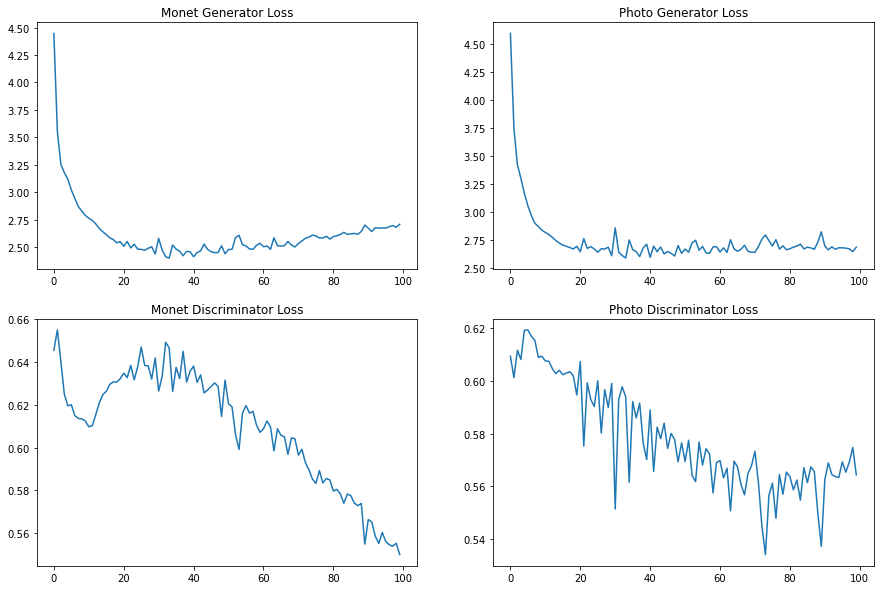

In [5]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(221)
ax.plot(monet_gen_loss)
ax.set_title("Monet Generator Loss")
ax = plt.subplot(222)
ax.plot(photo_gen_loss)
ax.set_title("Photo Generator Loss")
ax = plt.subplot(223)
ax.plot(monet_disc_loss)
ax.set_title("Monet Discriminator Loss")
ax = plt.subplot(224)
ax.plot(photo_disc_loss)
ax.set_title("Photo Discriminator Loss")

In [6]:
def plot_average_loss(loss_lists, normalize_loss=False):
    losses = np.zeros((len(loss_lists[0]), len(loss_lists)))
    
    for i in range(len(loss_lists)):
        losses[:, i] = loss_lists[i]
    
    if normalize_loss:
        for i in range(4):
            losses[:, i] = (losses[:, i] - losses[:, i].min()) / (losses[:, i].max() - losses[:, i].min())
    
    
    fig = plt.figure(figsize=(10, 8))
    plt.plot(np.mean(losses, axis=1))

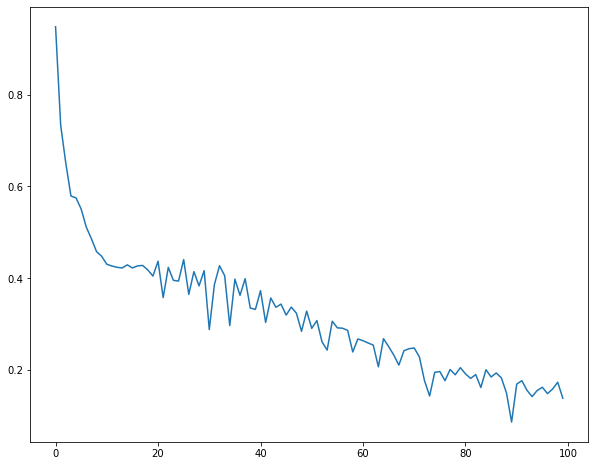

In [7]:
plot_average_loss([monet_gen_loss, photo_gen_loss, monet_disc_loss, photo_disc_loss], normalize_loss=True)

In [8]:
def extract_mifid():
    loss = []
    for m in re.finditer("Current=", loss_text):
        loss.append(float(loss_text[m.end():m.end() + 8]))
    return loss

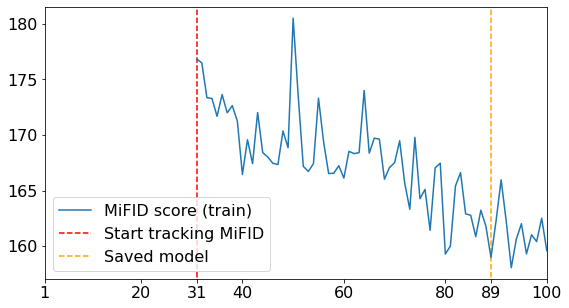

In [50]:
plt.figure(figsize=(9,5))
plt.rcParams['font.size'] = '16'
mifid = extract_mifid()
plt.plot(31*[None]+mifid, label="MiFID score (train)")

plt.vlines(31, 150, 200, colors='r', linestyles='dashed', label="Start tracking MiFID")
plt.vlines(89, 150, 200, colors='orange', linestyles='dashed', label="Saved model")
plt.xlim((1, 100))
plt.ylim((min(mifid) - 1, max(mifid)+ 1))
xticks = list(plt.xticks()[0])
xticks.remove(0)
plt.xticks(xticks + [1, 89, 31])
plt.legend(loc="lower left")
plt.savefig("mifid.pdf")